# Wages and divorce rates

By Mathilde Maix & Nina Frandsen Jensen

In this project we seek to analyze Danish men and womens wages from 2013 to 2021 as well as the divorce rate in Denmark from 2011 to 2022. In the last section, we investigate how women's and men's wages affect the divorce rate.
We use data from Danmarks Statistikbank. 

Imports and set magics:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})
plt.style.use('seaborn-whitegrid')

import ipywidgets as widgets
import seaborn as sns

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject


# Read and clean data

We are importing the three datasets from excel. 

**Dataset for men's wages:**

In [2]:
#Importing data
filename = 'wm.xlsx'
pd.read_excel(filename).head(7)

wm = pd.read_excel(filename, skiprows=2)


In [3]:
#Removing the first columns
drop_these = ['Unnamed: ' + str(num) for num in range(5)]
wm.drop(drop_these, axis=1, inplace=True)

In [4]:
wm.rename(columns = {'Unnamed: 5':'age_intervals'}, inplace=True)

#Renaming the columns
col_dict = {}
for i in range(2013, 2021+1): 
    col_dict[str(i)] = f'wm{i}' 
col_dict
wm.rename(columns = col_dict, inplace=True)

wm

,age_intervals,wm2013,wm2014,wm2015,wm2016,wm2017,wm2018,wm2019,wm2020,wm2021
0,Alder i alt,309.21,312.75,315.84,318.39,324.98,334.30,340.88,346.28,352.15
1,Under 20 år,116.27,119.26,122.70,122.71,124.81,127.10,128.59,131.26,139.71
2,20-24 år,179.52,182.77,186.73,189.26,194.14,200.92,202.93,205.53,209.94
3,25-29 år,238.14,241.58,244.36,248.56,254.57,263.53,269.17,273.53,279.24
4,30-34 år,284.70,286.74,288.26,291.61,298.79,307.44,314.42,320.42,327.12
5,35-39 år,318.20,320.50,323.47,326.31,333.20,342.00,347.92,352.83,358.49
6,40-44 år,337.04,341.27,346.18,349.73,356.58,366.24,372.72,377.34,383.26
7,45-49 år,343.65,347.78,352.39,357.63,367.18,377.95,386.38,392.18,398.22
8,50-54 år,336.81,341.22,347.06,353.69,362.64,374.81,385.04,390.88,398.58
9,55-59 år,327.33,332.27,336.70,342.28,350.00,361.74,371.40,379.90,388.47


In [5]:
#Changing from wide to long
wm_long = pd.wide_to_long(wm, stubnames='wm', i='age_intervals', j='year')
wm_long.head(10)

,,wm
age_intervals,year,
Alder i alt,2013,309.21
Under 20 år,2013,116.27
20-24 år,2013,179.52
25-29 år,2013,238.14
30-34 år,2013,284.70
35-39 år,2013,318.20
40-44 år,2013,337.04
45-49 år,2013,343.65
50-54 år,2013,336.81


# Importing and cleaning the second dataset

**Dataset for women's wages:**

In [6]:
#import data
filename = 'ww.xlsx'
pd.read_excel(filename).head(7)

ww = pd.read_excel(filename, skiprows=2)

In [7]:
#Removing the first columns
drop_these = ['Unnamed: ' + str(num) for num in range(5)] 
ww.drop(drop_these, axis=1, inplace=True)
print(drop_these)

['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']


In [8]:
ww.rename(columns = {'Unnamed: 5':'age_intervals'}, inplace=True)

# Renaming the columns
col_dict = {}
for i in range(2013, 2021+1): 
    col_dict[str(i)] = f'ww{i}' 
col_dict
ww.rename(columns = col_dict, inplace=True)


In [9]:
#Changing from wide to long
ww_long = pd.wide_to_long(ww, stubnames='ww', i='age_intervals', j='year')
ww_long.head(10)

,,ww
age_intervals,year,
Alder i alt,2013,270.72
Under 20 år,2013,117.71
20-24 år,2013,162.92
25-29 år,2013,229.47
30-34 år,2013,266.14
35-39 år,2013,279.79
40-44 år,2013,285.87
45-49 år,2013,288.30
50-54 år,2013,284.18


**Data set for divorce rate**

In [10]:
#Importing data
filename = 'div.xlsx'
pd.read_excel(filename).head(7)

div = pd.read_excel(filename, skiprows=2)

div

,Unnamed: 0,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Skilsmisseprocent (pct.),43.77,46.47,53.14,54.39,48.7,50.81,46.75,46.51,35.38,48,41.76,39.84


In [11]:
div.rename(columns = {'Unnamed: 0':'div_rate'}, inplace=True)

#Renaming the columns
col_dict = {}
for i in range(2011, 2022+1): 
    col_dict[str(i)] = f'div{i}' 
col_dict
div.rename(columns = col_dict, inplace=True)

In [12]:
#Changing from wide to long
div_long = pd.wide_to_long(div, stubnames='div', i='div_rate', j='year')
div_long.head(10)

div
div_rate                 year       
Skilsmisseprocent (pct.) 2011  43.77
                         2012  46.47
                         2013  53.14
                         2014  54.39
                         2015  48.70
                         2016  50.81
                         2017  46.75
                         2018  46.51
                         2019  35.38
                         2020  48.00

## Explore each data set

In order to analyse our data sets further, we create interactive plots for men's and women's wages, respectively, from 2013-2021. It is possible to select different age intervals.

In [13]:
#Resetting index
wm_long = wm_long.reset_index()
wm_long.loc[wm_long.age_intervals == 'Alder i alt', :]

,age_intervals,year,wm
0,Alder i alt,2013,309.21
11,Alder i alt,2014,312.75
22,Alder i alt,2015,315.84
33,Alder i alt,2016,318.39
44,Alder i alt,2017,324.98
55,Alder i alt,2018,334.30
66,Alder i alt,2019,340.88
77,Alder i alt,2020,346.28
88,Alder i alt,2021,352.15


**Interactive plot for men's wages**

In [14]:
# Defining a function to construct the interactive plot
def plot_m(df, age_intervals): 
    I = df['age_intervals'] == age_intervals
    ax=df.loc[I,:].plot(x='year', y='wm', style='-o', legend=False)
    ax.xaxis.set_ticks(np.arange(2013, 2022, 1))
    ax.set_ylabel('Wage in million DKK')
    ax.set_title('Interactive plot for different age groups for men\'s wage')

In [15]:
#Plotting men's wages
widgets.interact(plot_m, 
    df = widgets.fixed(wm_long),
    age_intervals = widgets.Dropdown(description='Age groups', 
                                    options=wm_long.age_intervals.unique(), 
                                    value='Alder i alt')
);

interactive(children=(Dropdown(description='Age groups', options=('Alder i alt', 'Under 20 år', '20-24 år', '2…

From the interactive plot above it is seen that most age groups follow an almost linear increasing trend. However, the age group "under 20 years" stagnate from 2015 to 2016, and it is also quite flat for the age group "60 or above" in the same period. 

**Interactive plot for women's wages**

In [16]:
#Resetting index
ww_long = ww_long.reset_index()
ww_long.loc[ww_long.age_intervals == 'Alder i alt', :]

,age_intervals,year,ww
0,Alder i alt,2013,270.72
11,Alder i alt,2014,275.58
22,Alder i alt,2015,280.45
33,Alder i alt,2016,283.60
44,Alder i alt,2017,290.11
55,Alder i alt,2018,297.94
66,Alder i alt,2019,304.03
77,Alder i alt,2020,312.18
88,Alder i alt,2021,316.83


In [17]:
#Defining a function to construct the interactive plot
def plot_w(df, age_intervals): 
    I = df['age_intervals'] == age_intervals
    ax=df.loc[I,:].plot(x='year', y='ww', style='-o', legend=False)
    ax.xaxis.set_ticks(np.arange(2013, 2022, 1))
    ax.set_ylabel('Wage in million DKK')
    ax.set_title('Interactive plot for different age groups for women\'s wage')

In [18]:
#Plotting women's wages
widgets.interact(plot_w, 
    df = widgets.fixed(ww_long),
    age_intervals = widgets.Dropdown(description='Age groups', 
                                    options=ww_long.age_intervals.unique(), 
                                    value='Alder i alt')
); 

interactive(children=(Dropdown(description='Age groups', options=('Alder i alt', 'Under 20 år', '20-24 år', '2…

It is seen from the figure above that the wage is increasing for all age groups. For the age group "under 20 years" there is a drop in the wages for women from 2015 to 2016.

# Merge data sets

Now we combine our loaded data sets, starting off with combining the two data sets for men's and women's wages.

In [19]:
#Merging the two wage data sets
mergedw = pd.merge(ww_long, wm_long, how='left', on=['year', 'age_intervals'])
mergedw.head(10)

,age_intervals,year,ww,wm
0,Alder i alt,2013,270.72,309.21
1,Under 20 år,2013,117.71,116.27
2,20-24 år,2013,162.92,179.52
3,25-29 år,2013,229.47,238.14
4,30-34 år,2013,266.14,284.70
5,35-39 år,2013,279.79,318.20
6,40-44 år,2013,285.87,337.04
7,45-49 år,2013,288.30,343.65
8,50-54 år,2013,284.18,336.81
9,55-59 år,2013,282.09,327.33


In [20]:
#Merging the dataset for men and women's wages and divorce rates
mergeda = pd.merge(mergedw, div_long, how='left', on=['year'])
mergeda.head(7)

,age_intervals,year,ww,wm,div
0,Alder i alt,2013,270.72,309.21,53.14
1,Under 20 år,2013,117.71,116.27,53.14
2,20-24 år,2013,162.92,179.52,53.14
3,25-29 år,2013,229.47,238.14,53.14
4,30-34 år,2013,266.14,284.70,53.14
5,35-39 år,2013,279.79,318.20,53.14
6,40-44 år,2013,285.87,337.04,53.14


We can see that the years 2011, 2012 and 2022 have been dropped from the merged data set, as wage information for those years was not included in our data set.

# Analysis

We create a summary table for men's and women's wage across several age intervals, in order to look at the mean, std, min, max and the three fractiles (25%, 50% and 75%).

In [21]:
#Creating table over summary statistics
mergeda.groupby(['age_intervals'])['wm', 'ww'].describe().head(11)

/var/folders/9j/v95rb3md0v72jhphm0mh6thr0000gn/T/ipykernel_72227/2074838230.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mergeda.groupby(['age_intervals'])['wm', 'ww'].describe().head(11)


wm                                                         \
                 count        mean        std     min     25%     50%     75%   
age_intervals                                                                   
20-24 år           9.0  194.637778  10.736144  179.52  186.73  194.14  202.93   
25-29 år           9.0  256.964444  14.954017  238.14  244.36  254.57  269.17   
30-34 år           9.0  302.166667  15.784138  284.70  288.26  298.79  314.42   
35-39 år           9.0  335.880000  14.928299  318.20  323.47  333.20  347.92   
40-44 år           9.0  358.928889  16.651764  337.04  346.18  356.58  372.72   
45-49 år           9.0  369.262222  20.230117  343.65  352.39  367.18  386.38   
50-54 år           9.0  365.636667  22.657985  336.81  347.06  362.64  385.04   
55-59 år           9.0  354.454444  21.954299  327.33  336.70  350.00  371.40   
60 år og derover   9.0  347.885556  14.542423  332.62  336.20  342.87  358.13   
Alder i alt        9.0  328.308889  15.640777  309.21  315.84  324.98  340.88   
Under 20 år        9.0  125.823333   6.950716  116.27  122.70  124.81  128.59   

                            ww                                                 \
                     max count        mean        std     min     25%     50%   
age_intervals                                                                   
20-24 år          209.94   9.0  176.558889  10.098439  162.92  168.62  175.59   
25-29 år          279.24   9.0  248.671111  14.066995  229.47  238.45  247.55   
30-34 år          327.12   9.0  287.345556  15.907326  266.14  276.03  285.57   
35-39 år          358.49   9.0  303.661111  17.410921  279.79  290.93  302.59   
40-44 år          383.26   9.0  311.525556  18.935568  285.87  297.68  309.80   
45-49 år          398.22   9.0  314.904444  20.120489  288.30  299.32  313.24   
50-54 år          398.58   9.0  311.837778  21.306085  284.18  294.85  309.67   
55-59 år          388.47   9.0  306.181111  19.011290  282.09  291.17  303.28   
60 år og derover  371.62   9.0  310.231111  15.198572  290.56  298.74  307.44   
Alder i alt       352.15   9.0  292.382222  16.326514  270.72  280.45  290.11   
Under 20 år       139.71   9.0  127.525556   8.235412  117.71  122.21  124.53   

                                  
                     75%     max  
age_intervals                     
20-24 år          183.43  191.80  
25-29 år          258.32  269.96  
30-34 år          297.66  312.26  
35-39 år          315.80  329.08  
40-44 år          324.72  339.84  
45-49 år          329.77  344.87  
50-54 år          327.92  343.19  
55-59 år          319.44  335.66  
60 år og derover  319.71  334.36  
Alder i alt       304.03  316.83  
Under 20 år       131.86  143.56

The table presented reveals that, among men, the age group "under 20 years" has the lowest mean wage while the age group "45-49 years" has the highest. However, the maximum wage value for men is observed in the age group "50-54 years".

On the other hand, women have the same highest and lowest mean wages in the aforementioned age groups, but the age group "45-49 years" exhibits the highest maximum wage value.

Overall, men's mean wages exceed women's mean wages across all age groups except for individuals "under 20 years" old.

/var/folders/9j/v95rb3md0v72jhphm0mh6thr0000gn/T/ipykernel_72227/3790560143.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mergeda.groupby('year')['wm', 'ww'].mean().plot(ax=ax,style='-o')


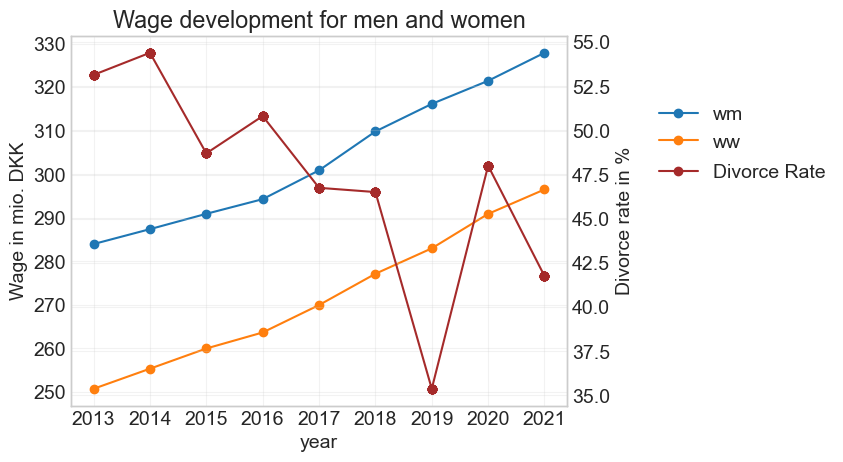

In [22]:
#Creating a figure
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

#Grouping by years and choosing to look at the wages for men and women only
mergeda.groupby('year')['wm', 'ww'].mean().plot(ax=ax,style='-o')

#Adding labels and titles
ax.xaxis.set_ticks(np.arange(2013, 2022, 1))
ax.set_ylabel('Wage in mio. DKK')
ax.set_title('Wage development for men and women');

#Dublicating the figure to be able to make two y-axes
ax2=ax.twinx()

#Creating the plot
ax2.plot(mergeda['year'], mergeda["div"],color="brown",marker="o",label='Divorce Rate')
ax2.set_ylabel("Divorce rate in %")
ax2.legend(loc='center left', bbox_to_anchor=(1.15, 0.63))
ax.legend(loc='center left', bbox_to_anchor=(1.15, 0.75))


From the graph it is seen that men generally earn more than women in Denmark. However, there doesn't seem to be a correlation between the divorce rate and the wages for both sexes. Overall, the divorce rate has declined in the period with a few exceptions (in 2016 and 2020), and it declined significantly in 2019. In the next section, we will explore whether the wages for both sexes have a significant effect on the divorce rate.

**Regression analysis**

In this section, we run an OLS regression in order to check whether men's and women's wages have a significant effect on the divorce rate.

$Divorce$ $rate$ = $\beta_0$ + $\beta_1$ * $men's$ $wage$ + $\beta_2$ * $women's$ $wage$

In [23]:
import statsmodels.api as sm

#Defining the predictor and the response variables
y = mergeda['div']
x = mergeda[['wm', 'ww']]

#Adding a constant to the predicto variable
x = sm.add_constant(x)

#Fitting the linear regression model
model = sm.OLS(y, x).fit()

#Viewing the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    div   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     3.640
Date:                Fri, 26 May 2023   Prob (F-statistic):             0.0299
Time:                        16:20:56   Log-Likelihood:                -305.73
No. Observations:                  99   AIC:                             617.5
Df Residuals:                      96   BIC:                             625.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.3944      2.817     19.311      0.0

Testing on a 5 pct. significance level, it is seen from the regresson above that both women's and men's wage have a significant effect on the divorce rate. An increase in women's wages will decrease the divorce rate with 13 pct., whereas an increase in men's wages will increase the divorce rate with 9 pct. 

# Conclusion

Our analysis shows that men in general have a higher wage than women in Denmark. We observe that in 2019, the divorce rate declined significantly. This is most likely due to a change in the divorce rules that were implemented in April 2019. From the regression analysis we find that an increase in women's wages has a negative effect on the divorce rate, whereas an increase in men's wages has a positive effect on the divorce rate. Our results are significant on a 5 pct. significance level.